Вторая часть тестового задания

Цель - провести разведочный анализ датасета, проверить его на выбросы и на общее качество данных и проверить:

- Есть ли ошибки в данных

- Есть ли пропуски в данных

- Что делать если данных нет или они некорректны

Ответить на вопрос:
<br>- “Кто из атлетов самый успешный за всю историю проведения игр?”
<br>- Проанализировать динамику распределения медалей по странам участникам. Визуализировать ее.
<br>- “Есть ли зависимость между страной проведения игр, страной происхождения участника и количеством заработанных медалей?”
<br>- “Есть ли зависимость между физическими данными (рост\вес) атлета и кол-вом побед в той или иной дисциплине?”
<br>- “Кто самый упорный из участников?” (долго шел к своей золотой медали).
<br>- “Как менялся средний возраст участников олимпийских игр с течением времени?”
<br>- Построить график Retention участия в соревнованиях. (Какой процент участников соревнований возвращается на каждую следующую олимпиаду)
<br>- Свободный кейс. Можете найти что-нибудь интересное в данных, визуализировать это и описать.

Датасет содержит информацию о достижениях атлетов в отдельных дисциплинах с 1896 по 2016 год.


- ID - Unique number for each athlete
- Name - Athlete's name
- Sex - M or F
- Age - Integer
- Height - In centimeters
- Weight - In kilograms
- Team - Team name
- NOC - National Olympic Committee 3-letter code
- Games - Year and season
- Year - Integer
- Season - Summer or Winter
- City - Host city
- Sport - Sport
- Event - Event
- Medal - Gold, Silver, Bronze, or NA

In [2]:
# импортируем библиотеки для работы с данными
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from calculate_retention import CalculateRetention
%matplotlib inline

In [109]:
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

matplotlib.rcParams['figure.figsize'] = (18,9)

pd.options.mode.chained_assignment = None

In [128]:
# загружаем данные, выводим общую информацию и пять случайных строк

df = pd.read_csv('athlete_events.zip', compression='zip')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271106 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39785 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


- Данные содержат 15 столбцов и 271116 записей.

,217969,231500,184406,161774,15073
ID,109485,116150,92674,81223,8133
Name,Shek Wai Hung,Mlanie Suchet,"Susan Jane ""Sue"" Pedersen (-Pankey)","Lyutvina Akhmedova ""Lyuba"" Mollova",Mara Noel Barrionuevo
Sex,M,F,F,F,F
Age,20.0,17.0,14.0,24.0,32.0
Height,165.0,162.0,175.0,169.0,171.0
Weight,58.0,65.0,70.0,66.0,58.0
Team,Hong Kong,France,United States,Bulgaria,Argentina
NOC,HKG,FRA,USA,BUL,ARG
Games,2012 Summer,1994 Winter,1968 Summer,1972 Summer,2016 Summer
Year,2012,1994,1968,1972,2016


In [5]:
# отбор числовых колонок
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['ID' 'Age' 'Height' 'Weight' 'Year']


In [6]:
# отбор нечисловых колонок
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['Name' 'Sex' 'Team' 'NOC' 'Games' 'Season' 'City' 'Sport' 'Event' 'Medal']


<h3>Проверим дата сет на отсутствующие значения с помощью тепловой карты.</h3>

<AxesSubplot:>

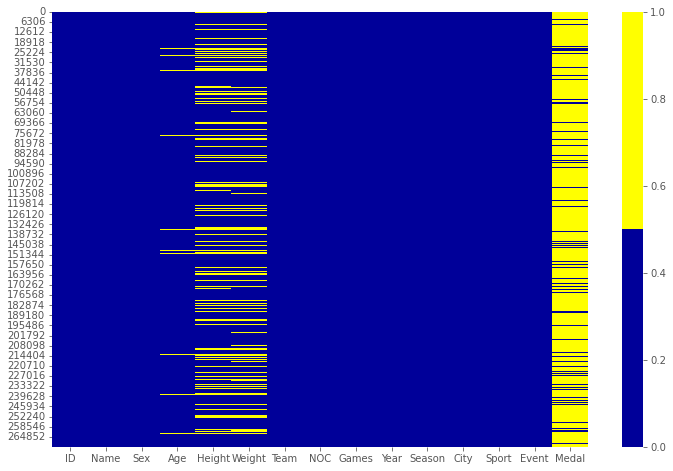

In [7]:
cols = df.columns[:] 
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [8]:
df.isnull().sum()

ID             0
Name           0
Sex           10
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231331
dtype: int64

In [9]:
# Выведем список пропущенных данных в процентах

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

ID - 0%
Name - 0%
Sex - 0%
Age - 3%
Height - 22%
Weight - 23%
Team - 0%
NOC - 0%
Games - 0%
Year - 0%
Season - 0%
City - 0%
Sport - 0%
Event - 0%
Medal - 85%


In [10]:
# Поскольку при беглом взгляде в столбце Medal указаны данные о медали, только у тех спортсменов, у кого она есть
# можно заполнить отстутсвующие данные No medal
df['Medal'] = df['Medal'].fillna('No medal')

Итого: Пропуски в данных есть. Самое большое количество пропущенных данные в столбцах height и weight Столбец medal мы заполнили значениями no medal там где информации о медали нет.

Посмотрим на данные и проверим на выбросы.


Что делать с пропусками в столбцах Age, height, weight, я пока не разобрался, т.к. если заполнять из разными значениями(медианное, среднее и тд.) результаты анализа могут исказится, также как и игнорирование этих строк, где встречается пропуск. Но я наверное пока выберу игнорировать эти строки. Тем более, что процент пропусков не очень большой(относительно) 

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,271116.0,68248.954396,39022.286345,1.0,34643.0,68205.0,102097.25,135571.0
Age,261642.0,25.557193,6.397129,6.0,21.0,24.0,28.00,100.0
Height,210945.0,175.338970,10.518462,127.0,168.0,175.0,183.00,226.0
Weight,208241.0,70.702393,14.348020,25.0,60.0,70.0,79.00,214.0
Year,271116.0,1978.378480,29.877632,1896.0,1960.0,1988.0,2002.00,2016.0


<AxesSubplot:>

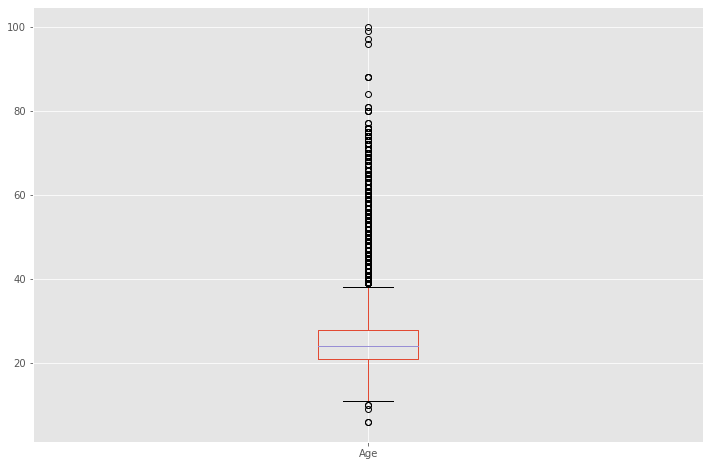

In [12]:
df.boxplot(column=['Age'])

видно, что максимальное значение Age равно 100, в то время как 75% квартиль равен только 28. Значит значение 100 – выброс.

<AxesSubplot:>

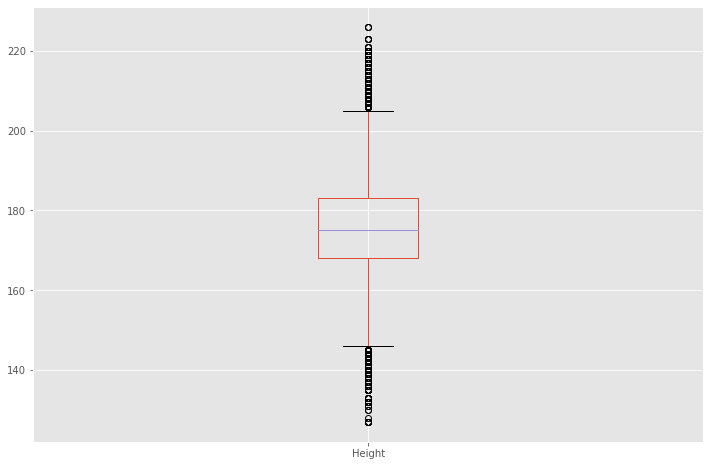

In [13]:
df.boxplot(column=['Height'])

<AxesSubplot:>

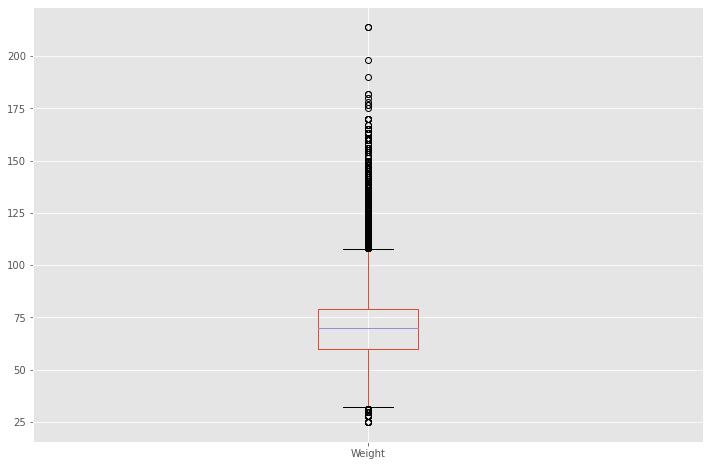

In [14]:
df.boxplot(column=['Weight'])

Аналогично возрасту в колонке вес и рост есть выбросы. 

Кто из атлетов самый успешный за всю историю проведения игр?
--

In [119]:
most_succes = df[['Name', 'Medal']]
most_succes = most_succes.loc[most_succes['Medal'] != 'No medal'].groupby('Name').count()
most_succes = most_succes.sort_values(by='Medal', ascending=False)
most_succes.head(1)

,Medal
Name,
"Michael Fred Phelps, II",28


##### За всю историю проведения Олимпийских игр самым успешным, по количеству медалей, - Майкл Фелпс. На его счету 28 наград. 


Как менялся средний возраст участников олимпийских игр с течением времени
--

In [15]:
df.groupby('Year')['Age'].mean()

Year
1896    23.580645
1900    29.034031
1904    26.698150
1906    27.125253
1908    26.970228
1912    27.538620
1920    29.290978
1924    28.373325
1928    29.112557
1932    32.582080
1936    27.530328
1948    28.783947
1952    26.161546
1956    25.926674
1960    25.168848
1964    24.944397
1968    24.248046
1972    24.308607
1976    23.841818
1980    23.694743
1984    23.896852
1988    24.079432
1992    24.318895
1994    24.422103
1996    24.915045
1998    25.163197
2000    25.427713
2002    25.916281
2004    25.643978
2006    25.959151
2008    25.731324
2010    26.124262
2012    25.961378
2014    25.987324
2016    26.207919
Name: Age, dtype: float64

<AxesSubplot:xlabel='Year', ylabel='Age'>

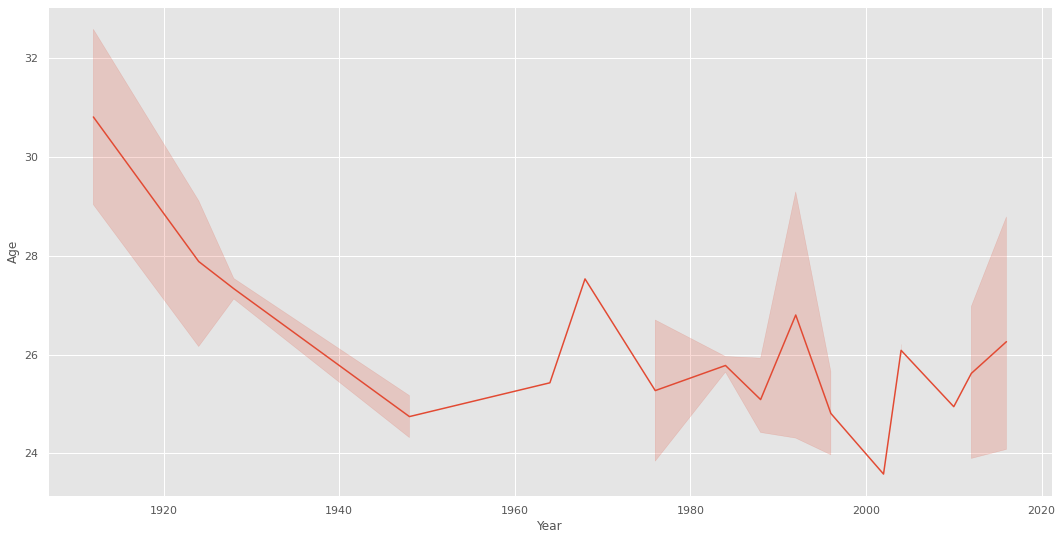

In [110]:
mean_age = df.groupby('Year')['Age'].mean()
sns.lineplot(data=df, x=df["Year"], y=mean_age)

<p>Средний возраст участников с течением времени уменьшался. Либо стало больше молодых людей, приходящих в спорт, либо был установлен возрастной порог. Как вариант еще, могли убрать дисциплины, в которых погли участвовать пожилые люли и люди старше среднего возраста.</p>

Проанализировать динамику распределения медалей по странам участникам. Визуализировать ее.
--

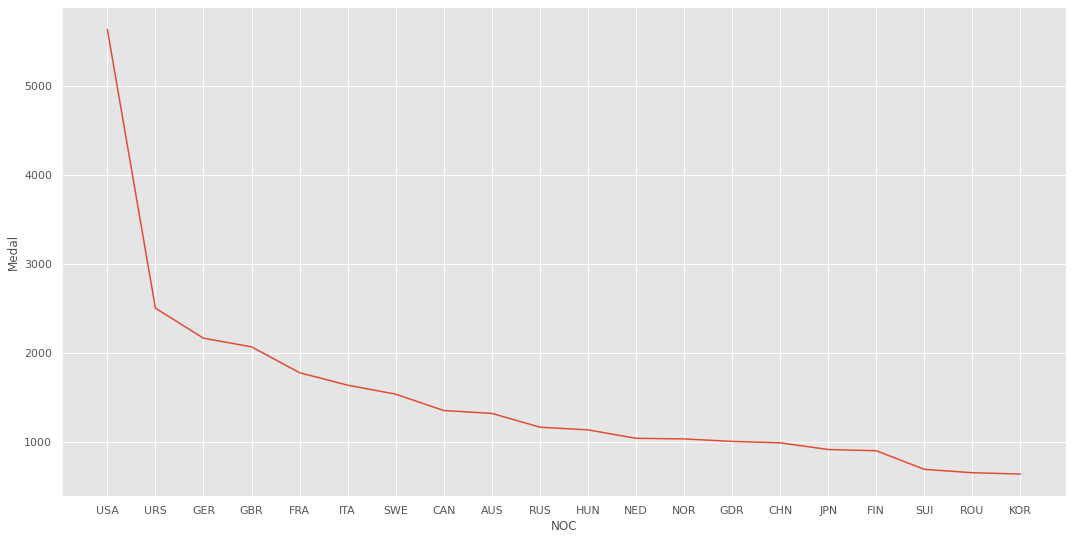

In [127]:
mdls_cntry = df[['NOC', 'Medal']]
mdls_cntry = mdls_cntry.loc[mdls_cntry['Medal'] != 'No medal'].groupby('NOC').count()
mdls_cntry = mdls_cntry.sort_values(by='Medal', ascending=False)
mdls_cntry.reset_index()
sns.lineplot(data=mdls_cntry[0:20], x="NOC", y="Medal");